## Ejemplo 5: Boxplots y Violinplots

### 1. Objetivos:
    - Aprender a generar boxplots y violinplots para analizar distribuciones de valores numéricos agrupados usando una variable categórica.
 
---
    
### 2. Desarrollo:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')

In [2]:
df = pd.read_csv('../../Datasets/athlete_olympic_events-clean.csv', index_col=0)

df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None


In [3]:
by_athlete = df.groupby(level=0)[['age', 'height', 'weight']].mean()
sex = df.groupby(level=0)['sex'].last()
merged = by_athlete.merge(sex, left_index=True, right_index=True)

In [4]:
merged

,age,height,weight,sex
athlete_id,,,,
1,24.000000,180.0,80.0,M
2,23.000000,170.0,60.0,M
5,24.333333,185.0,82.0,F
6,32.000000,188.0,75.0,M
7,32.000000,183.0,72.0,M
...,...,...,...,...
135567,26.000000,183.0,72.0,M
135568,33.000000,171.0,69.0,F
135569,29.000000,179.0,89.0,M


La tabla `merged` tiene 3 variables numéricas y 1 variable categórica. Ya hemos visto cómo podemos analizar la distribución de una variable numérica utilizando boxplots:

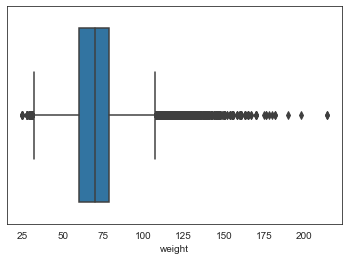

In [5]:
sns.boxplot(df['weight'])

Pero dado que tenemos una variable categórica (en este caso binaria, pues tiene solo dos valores posibles), podemos utilizar dos boxplots paralelos para analizar la distribución de esta misma variable numérica después de ser agrupada utilizando la variable categórica:

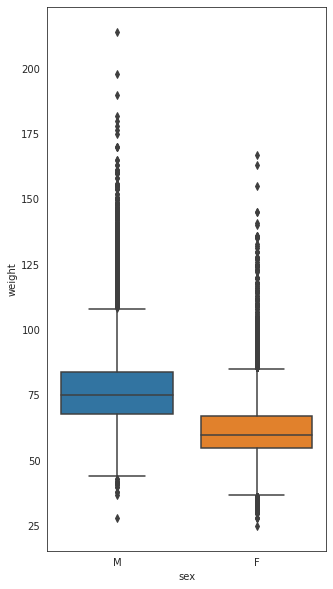

In [5]:
plt.figure(figsize=(5, 10))
sns.boxplot(data=merged, x='sex', y='weight');

También podemos explorar las distribuciones usando un violinplot. Un violinplot es muy parecido a un boxplot, pero la diferencia es que en vez de graficar frecuencias grafica estimados de densidad. ¿Recuerdas las gráficas de densidad que utilizamos para hacer los histogramas más 'suaves' y poder comparar dos histogramas al mismo tiempo? Bueno, un violinplot es básicamente un boxplot mezclado con una gráfica de densidad.

En un violinplot es mucho más fácil ver ciertos detalles en la distribución de los datos que no es posible ver en los boxplots (ya que un boxplot no tiene mucha flexibilidad en cuanto a figuras se refiere). En cambio, en un violinplot es mucho más difícil ver los valores atípicos y dónde se encuentran ubicados.

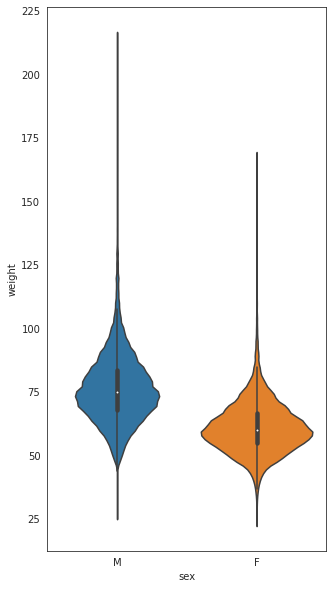

In [6]:
plt.figure(figsize=(5, 10))
sns.violinplot(data=merged, x='sex', y='weight');

La 'pildorita' negra en medio del violinplot representa el Rango Intercuartílico y el punto blanco la mediana. Así puedes comparar más fácilmente lo que estamos viendo en esta gráfica con la gráfica anterior.